### This projects takes the energy information from BP statistical review

### The source link for the excel file is https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2019-all-data.xlsx

#### The file has sort of energy information, the one used for this project is:
##### Solar Generation - TWh that displays the solar generation in TWh from 1965 til 2018

In [50]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

print('libraries imported')

libraries imported


In [4]:
#Import the Solar energy generation data
Solar = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Solar Generation - TWh', skiprows = 2)
display(Solar)

,Terawatt-hours,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2018.1,2007-17,2018.2,Unnamed: 58,Unnamed: 59
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.119800,2.895000,3.031314,3.292199,3.546251,0.077168,0.605416,0.006066,NaN,NaN
2,Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.221000,0.246000,0.252276,1.186506,2.242800,0.890256,0.629306,0.003836,NaN,NaN
3,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.216162,39.426263,55.420202,78.056566,97.118182,0.244203,0.532086,0.166119,NaN,NaN
4,Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.556962,42.567263,58.703792,82.535271,102.907233,0.246827,0.535420,0.176021,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,♦ Less than 0.05%.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,n/a not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,"USSR includes Georgia, Ukraine and the Baltic ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,"# Excludes Estonia, Latvia and Lithuania pri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 60 columns):
Terawatt-hours    110 non-null object
1965              90 non-null float64
1966              90 non-null float64
1967              90 non-null float64
1968              90 non-null float64
1969              90 non-null float64
1970              90 non-null float64
1971              90 non-null float64
1972              90 non-null float64
1973              90 non-null float64
1974              90 non-null float64
1975              90 non-null float64
1976              90 non-null float64
1977              90 non-null float64
1978              90 non-null float64
1979              90 non-null float64
1980              90 non-null float64
1981              90 non-null float64
1982              90 non-null float64
1983              90 non-null float64
1984              90 non-null float64
1985              99 non-null float64
1986              99 non-null float64
1987              99 

In [6]:
Solar.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Solar.shape

(119, 60)

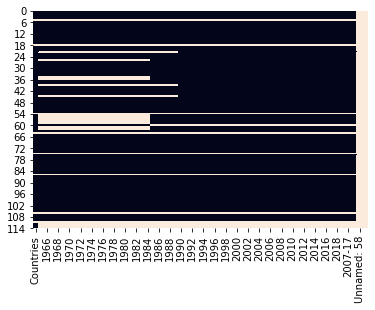

In [7]:
sns.heatmap(Solar.isnull(), cbar=False)

In [8]:
#Removing the Rows and Columns with NaN values
Solar.set_index('Countries', inplace=True)
Solar.dropna(how='all', axis = 0, inplace=True)
Solar.dropna(how='all', axis = 1, inplace=True)
Solar

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2012,2013,2014,2015,2016,2017,2018,2018.1,2007-17,2018.2
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.881000,1.498800,2.119800,2.895000,3.031314,3.292199,3.546251,0.077168,0.605416,0.006066
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.069000,0.106000,0.221000,0.246000,0.252276,1.186506,2.242800,0.890256,0.629306,0.003836
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.037014,16.039695,29.216162,39.426263,55.420202,78.056566,97.118182,0.244203,0.532086,0.166119
Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.987014,17.644495,31.556962,42.567263,58.703792,82.535271,102.907233,0.246827,0.535420,0.176021
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129,5.586376,0.651302,0.000185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total Asia Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.583028,32.338907,62.874749,99.193726,141.755229,227.196638,314.208553,0.382981,0.554996,0.537448
Total World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.764432,139.058571,197.910508,260.739219,328.378114,453.517657,584.630918,0.289103,0.501781,1.000000
of which: OECD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.901258,120.987670,159.610385,195.108778,233.808783,285.747684,337.214750,0.180114,0.440120,0.576799


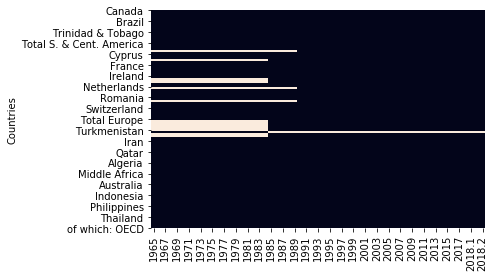

In [9]:
sns.heatmap(Solar.isnull(), cbar=False)

In [10]:
#Fill the NaN values with 0
Solar.fillna(0, inplace=True)

In [11]:
Solar.shape

(103, 57)

In [12]:
#Taking only the coutries and totals from 1965 til 2018
Solar = Solar.iloc[:-3,:-3]
Solar

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.109300,0.254200,0.571600,0.881000,1.498800,2.119800,2.895000,3.031314,3.292199,3.546251
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027000,0.031000,0.041000,0.069000,0.106000,0.221000,0.246000,0.252276,1.186506,2.242800
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.075960,3.013036,4.738904,9.037014,16.039695,29.216162,39.426263,55.420202,78.056566,97.118182
Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.212260,3.298236,5.351504,9.987014,17.644495,31.556962,42.567263,58.703792,82.535271,102.907233
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thailand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044400,0.058300,0.094400,0.498500,1.257500,1.933500,2.378000,3.377000,4.480862,4.719657
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.004000,0.007000,0.008882,0.080232
Other Asia Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029502,0.033575,0.044014,0.094996,0.112544,0.164956,0.222921,0.321929,0.477048,0.585724


## Working with the countries

In [13]:
#Taking only the countries
Countries = Solar[~Solar.index.str.startswith('Total')].sort_values(['Countries'])
Countries

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.009100,0.018119,0.026723,0.028600,0.060000,0.058000,0.245000,0.504000,0.603000
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.290242,0.977648,2.044547,2.412000,3.847400,4.952000,5.958000,7.474595,8.955110,12.081099
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048914,0.088813,0.174070,0.337483,0.625974,0.785246,0.937098,1.096016,1.268971,1.578641
Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000800,0.002900,0.004600,0.035300,0.037200,0.039260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020000,0.040277,0.243663,1.353764,2.010262,4.054062,7.533414,10.410948,11.524870,12.921815
Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.002460,0.002980,0.005220,0.005347,0.006748,0.008785,0.010036,0.010008,0.010008


In [14]:
Countries.shape

(92, 54)

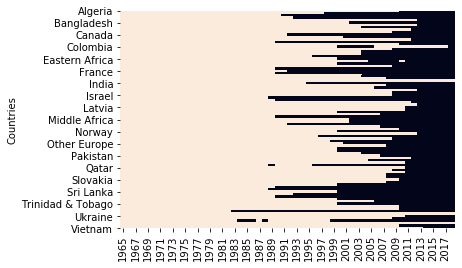

In [15]:
#Check the 0 values
sns.heatmap(Countries.isin([0]), cbar=False)

In [16]:
#Removing the rows with only zero values
Countries = Countries[(Countries.T != 0).any()]
Countries

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.009100,0.018119,0.026723,0.028600,0.060000,0.058000,0.245000,0.504000,0.603000
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.290242,0.977648,2.044547,2.412000,3.847400,4.952000,5.958000,7.474595,8.955110,12.081099
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048914,0.088813,0.174070,0.337483,0.625974,0.785246,0.937098,1.096016,1.268971,1.578641
Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000800,0.002900,0.004600,0.035300,0.037200,0.039260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016900,0.018100,0.021200,0.024100,0.103800,0.300700,0.301000,0.331300,0.532373,0.946883
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020000,0.040277,0.243663,1.353764,2.010262,4.054062,7.533414,10.410948,11.524870,12.921815
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.002460,0.002980,0.005220,0.005347,0.006748,0.008785,0.010036,0.010008,0.010008


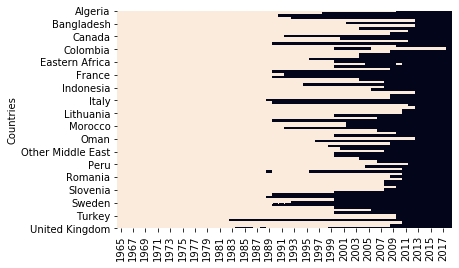

In [17]:
#Check the 0 values
sns.heatmap(Countries.isin([0]), cbar=False)

In [60]:
#Take the years from 2008 til 2018
Countries_New = Countries.iloc[:,Countries.columns.get_loc(2008):]
Countries_New

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,
Algeria,0.000000,0.000000,0.009100,0.018119,0.026723,0.028600,0.060000,0.058000,0.245000,0.504000,0.603000
Argentina,0.000144,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129
Australia,0.139200,0.290242,0.977648,2.044547,2.412000,3.847400,4.952000,5.958000,7.474595,8.955110,12.081099
Austria,0.030120,0.048914,0.088813,0.174070,0.337483,0.625974,0.785246,0.937098,1.096016,1.268971,1.578641
Azerbaijan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.002900,0.004600,0.035300,0.037200,0.039260
...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0.000000,0.016900,0.018100,0.021200,0.024100,0.103800,0.300700,0.301000,0.331300,0.532373,0.946883
United Kingdom,0.017000,0.020000,0.040277,0.243663,1.353764,2.010262,4.054062,7.533414,10.410948,11.524870,12.921815
Venezuela,0.000000,0.000000,0.002460,0.002980,0.005220,0.005347,0.006748,0.008785,0.010036,0.010008,0.010008


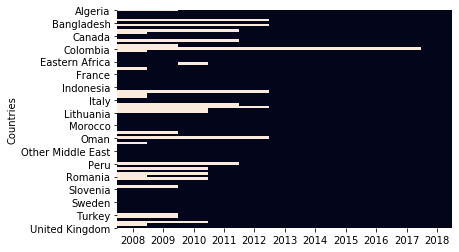

In [61]:
#Check the 0 values
sns.heatmap(Countries_New.isin([0]), cbar=False)

The degree of the equation is: 1
The RMSE is 0.13563806324225375 and R2 is 0.7674883269581637

The generation (original value) for 2018 is [0.9468835]
The prediction for 2018 is [[0.62567384]]
The prediction for 2019 is [[0.70360212]]
The prediction for 2020 is [[0.7815304]]


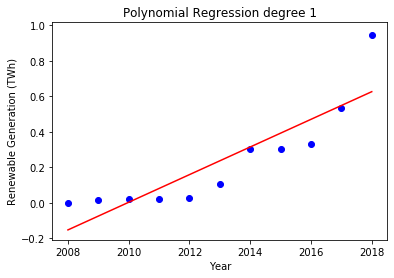

The degree of the equation is: 2
The RMSE is 0.07053832813049202 and R2 is 0.9371171921995692

The generation (original value) for 2018 is [0.9468835]
The prediction for 2018 is [[0.82244119]]
The prediction for 2019 is [[1.04466552]]
The prediction for 2020 is [[1.2931255]]


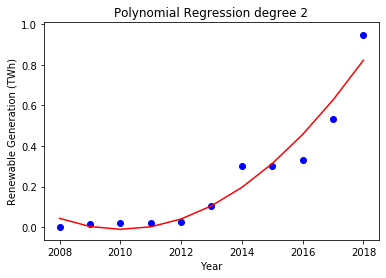

The degree of the equation is: 3
The RMSE is 0.059833163093524856 and R2 is 0.9547555277954894

The generation (original value) for 2018 is [0.9468835]
The prediction for 2018 is [[0.8792744]]
The prediction for 2019 is [[1.21689239]]
The prediction for 2020 is [[1.63748591]]


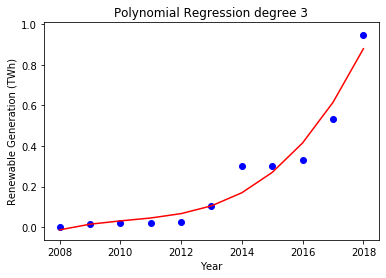

The degree of the equation is: 4
The RMSE is 0.05981296442437287 and R2 is 0.9547860701844535

The generation (original value) for 2018 is [0.9468835]
The prediction for 2018 is [[0.87928415]]
The prediction for 2019 is [[1.21723532]]
The prediction for 2020 is [[1.63844791]]


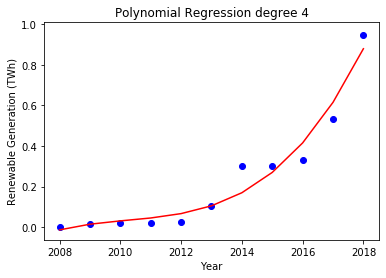

In [73]:
#Linear regression for one country
df=Countries_New.transpose()
x=df.index.values.reshape(-1,1)
y=df['United Arab Emirates'].values.reshape(-1,1)

for i in range(1,5):
    print('The degree of the equation is: '+str(i))
        
    #Fit the Poly regression
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x)
    poly.fit(x_poly,y)
    
    lin=LinearRegression()
    lin.fit(x_poly,y)
    y_poly_pred = lin.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print('The RMSE is {} and R2 is {}'. format(rmse, r2))
    print('')
    print('The generation (original value) for 2018 is {}'.format(y[-1]))
    print('The prediction for 2018 is {}'.format(lin.predict(poly.fit_transform([[2018]]))))
    print('The prediction for 2019 is {}'.format(lin.predict(poly.fit_transform([[2019]]))))
    print('The prediction for 2020 is {}'.format(lin.predict(poly.fit_transform([[2020]]))))
    
    #Plot Poly regression
    plt.scatter(x,y,color='blue')
    plt.plot(x,lin.predict(poly.fit_transform(x)),color='red')
    plt.title('Polynomial Regression degree '+str(i))
    plt.xlabel('Year')
    plt.ylabel('Renewable Generation (TWh)')
    plt.show()


### Working with the Totals by region

In [ ]:
#Taking only the totals by region
Total = Solar[Solar.index.str.startswith('Total')].sort_values(['Countries'])
Total